# Mixture gradient experiments

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pl
from scipy.misc import derivative
from scipy.stats import norm


In [50]:
normjk = lambda mk, mj, Sk, Sj: norm.pdf(mk, loc=mj, scale=np.sqrt(Sk + Sj))
normk = lambda k, m, S: np.sum([normjk(m[k], mj, S[k], Sj) for mj, Sj in zip(m, S)])
    
def EntropyLB(m, S):

    K = len(m)
    H = np.sum([np.log(normk(k, m, S) / K) for k in range(K)]) / K
    return H


In [57]:
m = np.array([0., 1., 2., -1., -2.])
S = np.ones(5)


def EntropLB0(m0):
    
    mt = m.copy()
    mt[0] = m0
    return EntropyLB(mt, S)


def dEntropLB0(m0):
    
    K = len(m)
    
    dm0 = 0
    for l in range(K):
        dnorm = (m[0] - m[l]) / (S[0] + S[l])
        norm0l = normjk(m[0], m[l], S[0], S[l])
        z0 = normk(0, m, S)
        zl = normk(l, m, S)
        dm0 += (norm0l / z0 + norm0l / zl) * dnorm / K
    
    return dm0 / K


In [58]:
m0 = np.linspace(-10, 10, 100)
H = [EntropLB0(m0i) for m0i in m0]
dm0_num = [derivative(EntropLB0, m0i) for m0i in m0]
dm0_ana = [dEntropLB0(m0i) for m0i in m0]


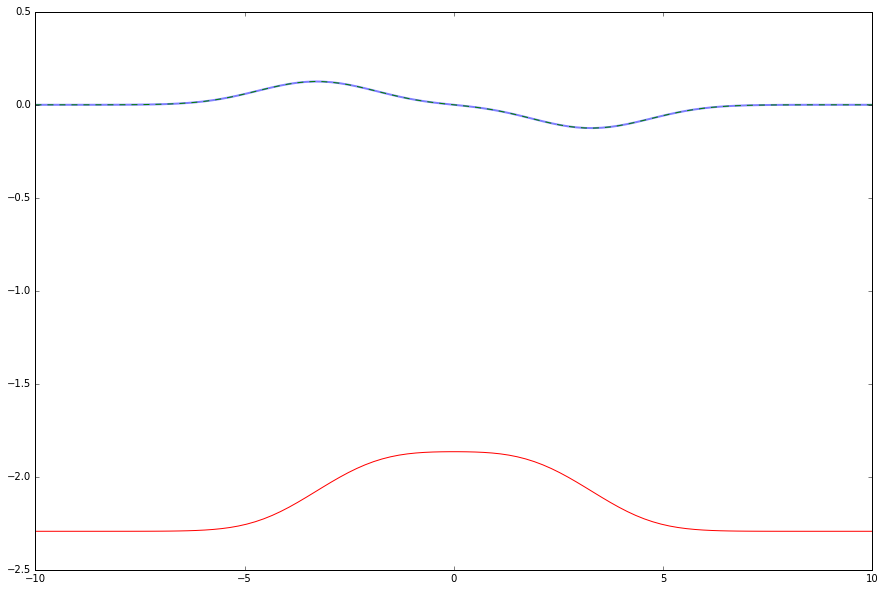

In [60]:
pl.figure(figsize=(15, 10))
pl.plot(m0, H, 'r', label='Entropy')
pl.plot(m0, dm0, 'b', linewidth=2, alpha=0.5, label='dH/dm Numerical')
pl.plot(m0, dm0, 'g--', label='dH/dm Analytical')
pl.show()
